In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../input/depression.csv")

In [3]:
df

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT
0,1,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017
1,2,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017
2,3,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017
3,4,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017
4,5,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017
...,...,...,...,...
995,996,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018
996,997,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018
997,998,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017
998,999,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018


In [4]:
text = " ".join(df["TWEET_TEXT"]) 

In [5]:
text

'Deberían eliminar a las malas personas y a los que odiamos vivir\n... el mundo sería mejor sin nosotros Ya deja de intentar contarle tus problemas a alguien. Entiende A NADIE LE IMPORTAS!!!!! La tristeza es lo más fácil de ocultar de todos los sentimientos que trae consigo la depresión\n\n#LaDepresiónEsMulticolor De las peores cosas de la depresión es que no te deja ganas de vivir... Ni de matarte.\nSólo te tiene aquí, agonizando La soledad es lo único constante en mi vida. Creo que nunca conoceré el AMOR, la AMISTAD, la FELICIDAD... lo que es VIVIR\rYa me cansé! Quiero desaparecer, pero al mismo tiempo quisiera que alguien se diera cuenta el infierno en el que vivo No madre, no estoy enferma de flojera\nno, no tengo narcolepsia\n\n...ME ESTÁ CONSUMIENDO LA DEPRESIÓN Mi vida no tiene sentido.\n\n...tengo las mismas ganas de irme de este mundo, como aquel que está en una fiesta donde… EXTERNAL_LINK Ya me cansé de ser gorda\nYa me cansé de ser un fracaso\nYa me cansé de ser\n... Ya quie

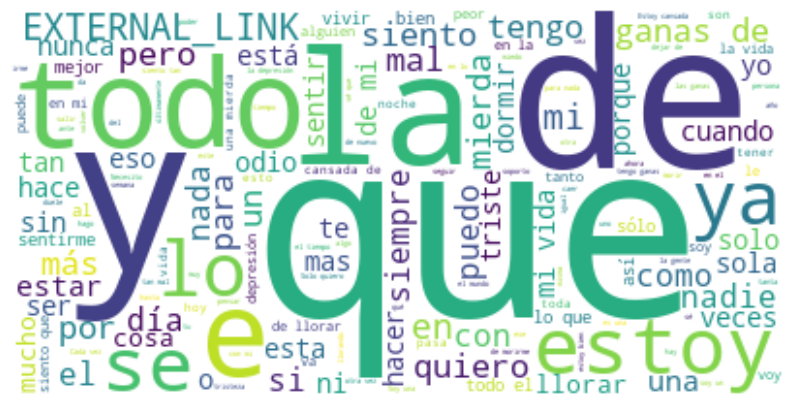

In [6]:
wc = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sebastian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
stops= stopwords.words("spanish")

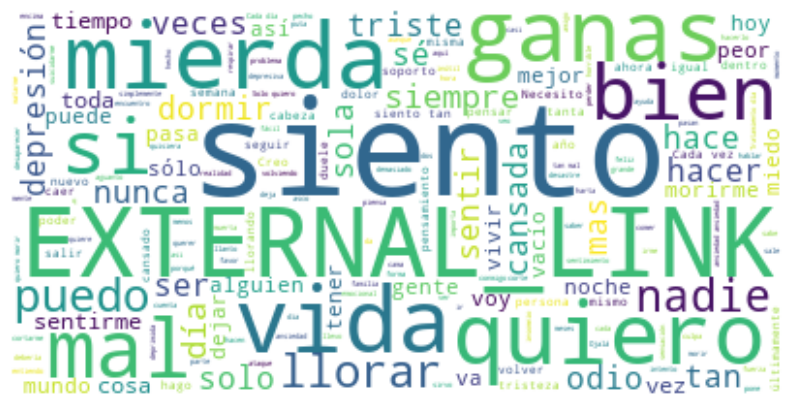

In [10]:
wc = WordCloud(stopwords=stops,background_color="white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
import string 

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from nltk.stem import SnowballStemmer
from nltk import word_tokenize

In [14]:
def prepro(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    stemmer = SnowballStemmer("spanish")
    text = " ".join([stemmer.stem(word) for word in word_tokenize(text) if word not in stops])
    return text

In [15]:
(df["TWEET_TEXT"]).iloc[0]

'Deberían eliminar a las malas personas y a los que odiamos vivir\n... el mundo sería mejor sin nosotros'

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sebastian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df["TWEET_TEXT"].apply(prepro).iloc[0]

'deb elimin mal person odi viv mund mejor'

In [18]:
ser = df["TWEET_TEXT"].apply(prepro)

In [19]:
corpus = ser.values

In [20]:
corpus

array(['deb elimin mal person odi viv mund mejor',
       'dej intent cont problem algui entiend nadi import',
       'tristez facil ocult sentimient tra consig depresion ladepresionesmulticolor',
       'peor cos depresion dej gan viv matart sol aqu agoniz',
       'soled unic constant vid cre nunc conoc amor amist felic viv cans',
       'quier desaparec mism tiemp quis algui dier cuent infiern viv',
       'madr enferm flojer narcolepsi consum depresion',
       'vid mism gan irme mund aquel fiest donde… externallink',
       'cans ser gord cans ser fracas cans ser quier irmeeeeeeee',
       'segun calcul deb muert',
       'odi sent tan incomod rod gent odi sent insegur gent mir',
       'cad dia gan mor', 'rar neutr trist feliz sol ahi sent',
       'tan toxic conmig mism pong pens cos hac mal imagin situacion pon mal doy pelotud',
       'nunc pas empiez sent trist sentis vaci dentr sab com llen y… externallink',
       'necesit atencion contencion constant 0 estabil mental emoci

In [21]:
vectorizer = TfidfVectorizer()

In [22]:
X = vectorizer.fit_transform(corpus)

In [23]:
X.shape

(1000, 1237)

In [24]:
print(X)

  (0, 319)	0.37278352148851024
  (0, 414)	0.5104390975038607
  (0, 716)	0.2569374834264725
  (0, 880)	0.35118052666683575
  (0, 831)	0.3021466211446732
  (0, 1224)	0.3079642241767111
  (0, 800)	0.35118052666683575
  (0, 743)	0.3188689931533674
  (1, 327)	0.2788388838323981
  (1, 639)	0.3620445366372732
  (1, 268)	0.46787788217339127
  (1, 927)	0.3851612214491821
  (1, 67)	0.32793778493269543
  (1, 449)	0.3620445366372732
  (1, 807)	0.2788388838323981
  (1, 610)	0.32793778493269543
  (2, 1170)	0.2894623418852758
  (2, 509)	0.3330313732183951
  (2, 830)	0.3970899260389637
  (2, 1055)	0.3213305443842423
  (2, 1158)	0.4207320319143067
  (2, 264)	0.36730439520188857
  (2, 337)	0.23542413825806163
  (2, 672)	0.4207320319143067
  (3, 1224)	0.2740688510299696
  :	:
  (991, 104)	0.8562317120344485
  (992, 549)	0.6545889838275228
  (992, 782)	0.7559849616570761
  (993, 449)	0.33241061204612393
  (993, 1175)	0.3761340858749858
  (993, 553)	0.3099116853908676
  (993, 1065)	0.24843681524900135
  (9

In [25]:
dfx = pd.DataFrame.sparse.from_spmatrix(X)

In [26]:
vectorizer.get_feature_names_out()[319]

'deb'

In [27]:
dfx

,0,1,2,3,4,5,6,7,8,9,...,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
pca = PCA(n_components=500)

In [29]:
pca.fit(dfx.values)

PCA(n_components=500)

In [30]:
np.sum(pca.explained_variance_ratio_)

0.9338662642611122

In [31]:
X_pca = pca.transform(dfx.values)

In [32]:
X_pca

array([[-0.04713733, -0.00991805, -0.04108315, ...,  0.00060373,
         0.03124618, -0.02264674],
       [ 0.01942276, -0.01394319,  0.04305793, ...,  0.00897438,
         0.01465679, -0.02789718],
       [ 0.01647867,  0.00825718,  0.00677948, ...,  0.03245041,
         0.00481281,  0.02275053],
       ...,
       [-0.09376974,  0.20399688, -0.04674578, ...,  0.00533009,
         0.00066242,  0.01013655],
       [-0.07805061,  0.22092852, -0.05665776, ...,  0.00030413,
        -0.00212693,  0.0022546 ],
       [-0.02803831,  0.05738261,  0.01209446, ...,  0.00621621,
        -0.00236827,  0.01822561]])